# CSE 514A Programming Assignment 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Data Pre-processing

Pre-process the attribute values of your data by normalizing or standardizing each variable. Keep a copy that was not pre-processed, so you can analyze the effect that pre-processing the data has on the optimization.

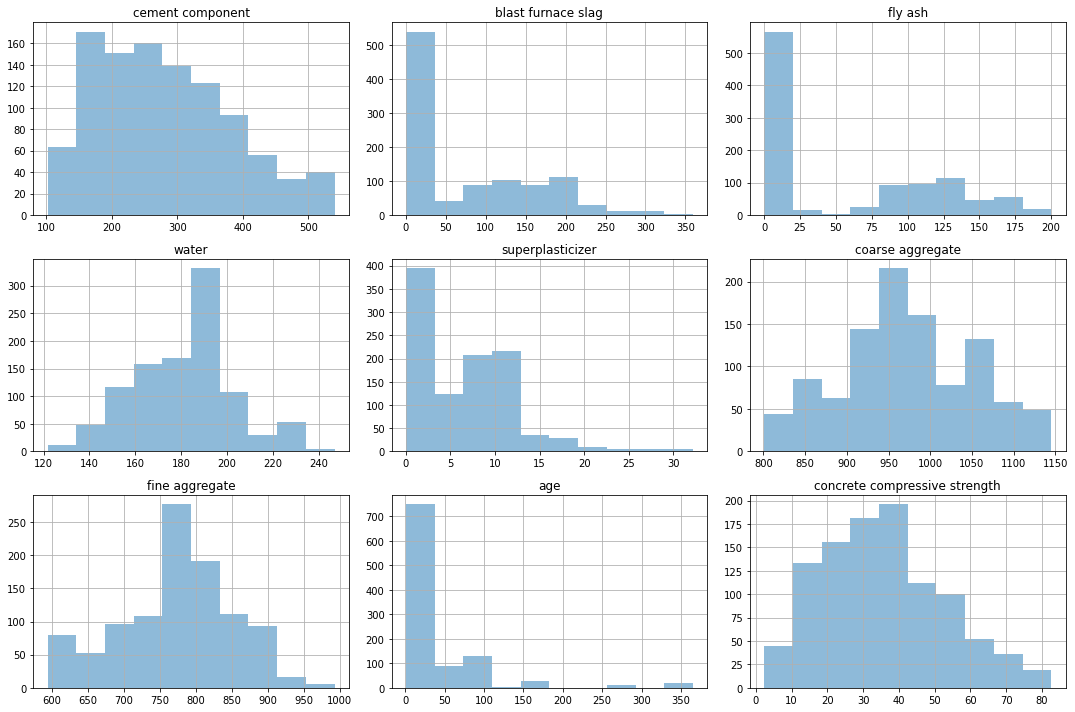

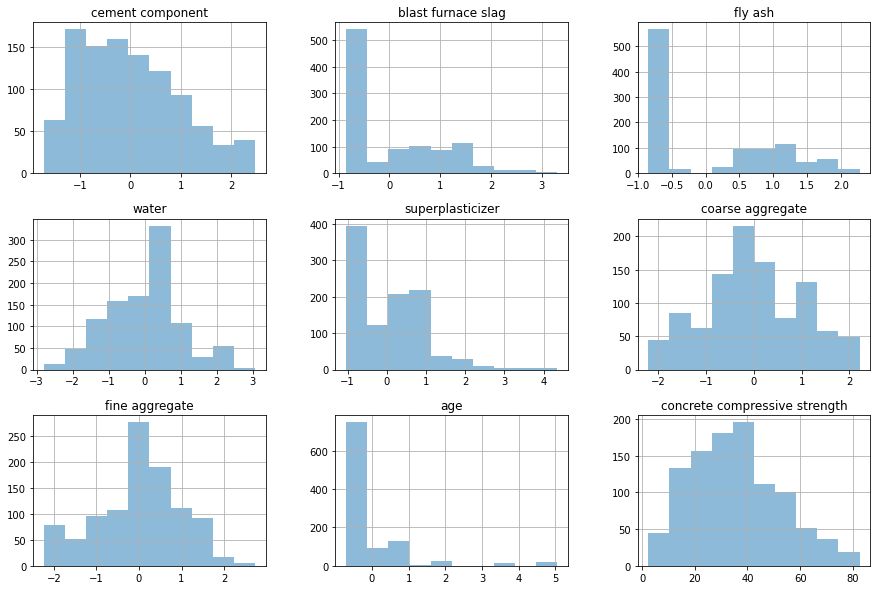

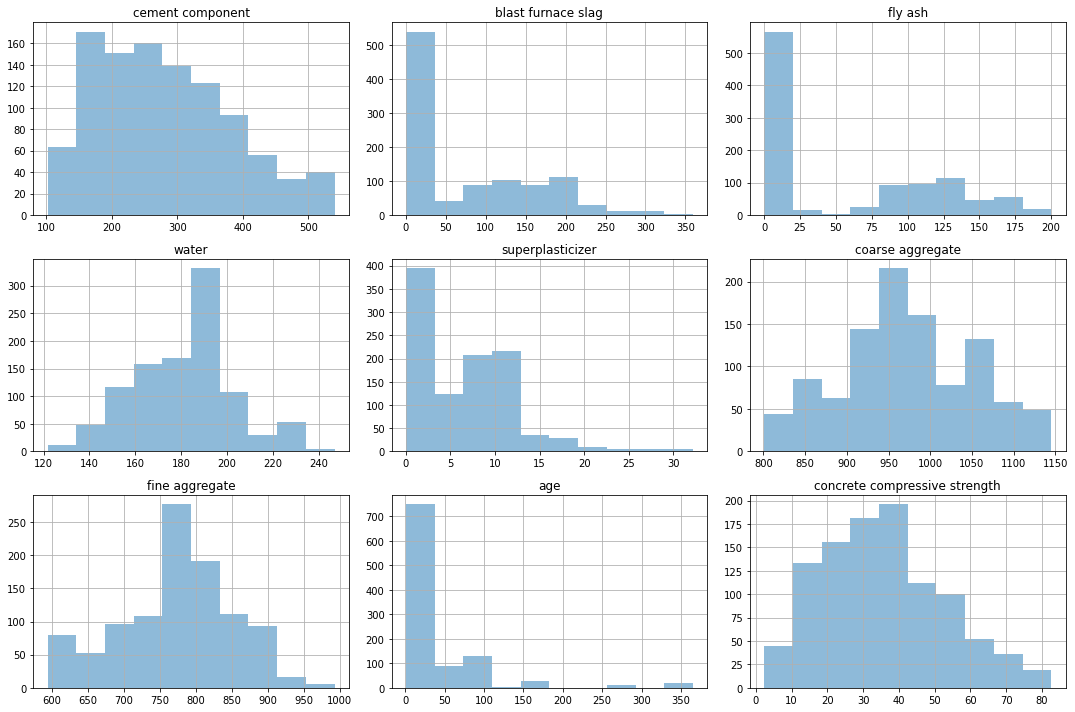

In [2]:
headerlist = ['cement component', 'blast furnace slag', 'fly ash', 'water', 'superplasticizer', 'coarse aggregate', 'fine aggregate', 'age', 'concrete compressive strength']
data_og = pd.read_excel('Concrete_Data.xls', names=headerlist)
# print(data_og)

data_og.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()  

data_pp = data_og.copy()

#linear scaling for each feature
for header in headerlist:
    if (header != 'concrete compressive strength'):
        data_pp[header] = (data_pp[header] - data_pp[header].mean()) / data_pp[header].std()

data_pp.hist(alpha=0.5, figsize=(15, 10))
data_og.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()  

## B) Univariate Linear Regression

In [3]:
def uni_reg(m, x, b):
    y= m*x + b
    
    return y

#gradient descent
y_og = data_og['concrete compressive strength']
y_scaled = data_pp['concrete compressive strength']

int n = np.size(data)

#
for i in range(n):
    x_i = x[i]
    y_i = y[i]
    update_m += -2*x_i*(y_i - (m*x_i + b_old))
    update_b += -2*(y_i - (m*x_i + b_old))
m_new = m_old - (alpha/n*update_m)
b_new = b_old - (alpha/n*update_b)

## C) Multivariate Linear Regression

In [4]:
data_pp

,cement component,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,concrete compressive strength
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597,79.986111
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597,61.887366
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340,40.269535
3,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,5.055221,41.052780
4,-0.790048,0.678084,-0.846721,0.488568,-1.038440,0.070497,0.647594,4.976069,44.296075
...,...,...,...,...,...,...,...,...,...
1025,-0.045601,0.488004,0.564295,-0.092077,0.451476,-1.322361,-0.065842,-0.279597,44.284354
1026,0.392647,-0.856470,0.959629,0.675873,0.702585,-1.993710,0.496675,-0.279597,31.178794
1027,-1.269441,0.759216,0.850248,0.521346,-0.017262,-1.035558,0.080088,-0.279597,23.696601
1028,-1.168012,1.307437,-0.846721,-0.279382,0.853251,0.214541,0.191095,-0.279597,32.768036
